In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

read_2023=pd.read_csv('~/Library/Mobile Documents/com~apple~CloudDocs/LC_DA/Git/Read_2023/Read_2023.csv')
read_2023.head()

,Title,Page_Num,Graphic,Star_Wars,Fantasy,Romance,Self_Help,YA
0,Demon in the Wood,203,1,NaN,1.0,NaN,NaN,NaN
1,"Snow, Glass, Apples",64,1,NaN,1.0,1.0,NaN,NaN
2,Rebel Jail,142,1,1.0,NaN,NaN,NaN,NaN
3,Last Flight of the Harbinger,152,1,1.0,NaN,NaN,NaN,NaN
4,Brotherhood,332,0,1.0,NaN,NaN,NaN,NaN


In [2]:
read_2023=read_2023.fillna(0)
read_2023.head()

,Title,Page_Num,Graphic,Star_Wars,Fantasy,Romance,Self_Help,YA
0,Demon in the Wood,203,1,0.0,1.0,0.0,0.0,0.0
1,"Snow, Glass, Apples",64,1,0.0,1.0,1.0,0.0,0.0
2,Rebel Jail,142,1,1.0,0.0,0.0,0.0,0.0
3,Last Flight of the Harbinger,152,1,1.0,0.0,0.0,0.0,0.0
4,Brotherhood,332,0,1.0,0.0,0.0,0.0,0.0


In [3]:
read_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      67 non-null     object 
 1   Page_Num   67 non-null     int64  
 2   Graphic    67 non-null     int64  
 3   Star_Wars  67 non-null     float64
 4   Fantasy    67 non-null     float64
 5   Romance    67 non-null     float64
 6   Self_Help  67 non-null     float64
 7   YA         67 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.3+ KB


In [4]:
def count(series1, series2):
    if series1 == 1 and series2 <400:
        return 0.25
    elif series1 == 1 and series2 >=400:
        return 0.5
    elif series1 == 0 and series2 <400:
        return 1
    elif series1 == 0 and series2 >=400:
        return 2
    elif series1 == 0 and series2 >=800:
        return 3
    else:
        return 0
    
read_2023['count'] = read_2023.apply(lambda x: count(x['Graphic'], x['Page_Num']), axis=1)
read_2023.head()

,Title,Page_Num,Graphic,Star_Wars,Fantasy,Romance,Self_Help,YA,count
0,Demon in the Wood,203,1,0.0,1.0,0.0,0.0,0.0,0.25
1,"Snow, Glass, Apples",64,1,0.0,1.0,1.0,0.0,0.0,0.25
2,Rebel Jail,142,1,1.0,0.0,0.0,0.0,0.0,0.25
3,Last Flight of the Harbinger,152,1,1.0,0.0,0.0,0.0,0.0,0.25
4,Brotherhood,332,0,1.0,0.0,0.0,0.0,0.0,1.00


In [5]:
read_2023['count'].sum()

69.75

In [6]:
read_2023.value_counts('Star_Wars', normalize=True)

Star_Wars
0.0    0.626866
1.0    0.373134
dtype: float64

In [7]:
read_2023.value_counts('Self_Help', normalize=True)

Self_Help
0.0    0.910448
1.0    0.089552
dtype: float64

In [8]:
read_2023.value_counts('YA', normalize=True)

YA
0.0    0.880597
1.0    0.119403
dtype: float64

In [9]:
read_2023.pivot_table('Star_Wars', index='Graphic')

,Star_Wars
Graphic,
0,0.209302
1,0.666667


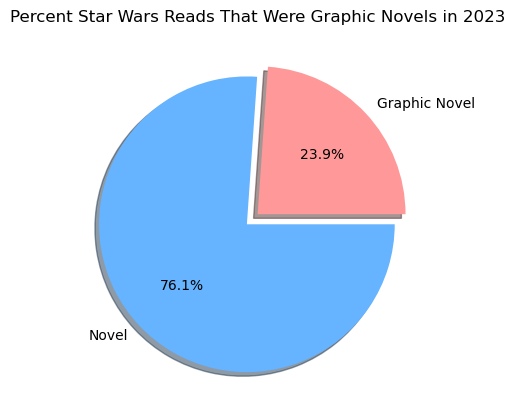

In [10]:
labels = ['Graphic Novel', 'Novel']
colors = ['#ff9999','#66b3ff']
star_wars_graphic = read_2023.pivot_table('Star_Wars', index='Graphic')

plt.title('Percent Star Wars Reads That Were Graphic Novels in 2023')
plt.pie(star_wars_graphic['Star_Wars'], explode = (0, 0.1), shadow=True, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()